# Project: Banknote Authentication using Machine Learning

## Machine Learning part

### Aim: Classification of banknotes

#### Introduction

In this part of the project, we employ several supervised Machine Learning algorithms to build models that distinguish between
genuine and counterfeit banknotes. We will analyze these algorithms to choose the best candidate, and then try to further
optimize the algorithm to best model the data. Our goal with this implementation is to accurately predict whether a currency
note is genuine or counterfeit.

#### Why we choose python?

Python, which is a great compromise between practicality (with handy data format and manipulation) and scalability (much
easier to implement for large scale, automated computation than R, Octave or Matlab). More precisely, Python 3.5.1 with the
Anaconda distribution 2.4.0. Especially Jupiter Notebooks are really convenient to work in team, we also used Github.

### Libraries and packages

1)  numpy 1.10.1: providing key data format, mathematical manipulation techniques.\
2)  pandas 0.17.1: for advanced data format, high-level manipulation and visualization.\
3)  pyplot from matplotlib 1.5.0: for basic visualization.\
4)  seaborn: to do some data visualization

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print("Successfullly imported all librairies")

Successfullly imported all librairies


## Loading the dataset

In [65]:
df = pd.read_csv('BankNote_Authentication.csv')

In [66]:
ds = df.values

print(ds)

[[  3.6216    8.6661   -2.8073   -0.44699   0.     ]
 [  4.5459    8.1674   -2.4586   -1.4621    0.     ]
 [  3.866    -2.6383    1.9242    0.10645   0.     ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]]


In [69]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

#### The dataset was built by applying an enhancement process and then a wavelet transform on images of banknotes to extract these four features:

Variance: measure of how far a set of numbers is spread out.\
Skewness: measure of the asymmetry of the probability distribution of a real-valued random variable.\
Kurtosis: measure of the shape of the probability distribution of a real-valued random variable., respectively second, third and fourth moment of the distribution.\
Entropy: measure of the amount of information or randomness, which is represented by how different adjacent pixels are.

###### The label of the note: 0 if the bank is forged and 1 if it is genuine.


### Dataset overview and exploratory analysis

In [70]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


###### The first four columns are features about the banknote of the dataset. The last column 'class' is a binary value to know either the banknote is geniune (value = 1) or counterfeit (value = 0).

In [71]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [73]:
df.describe(include = 'all')

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [74]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

## Size of the data set

In [75]:
rows = len(df)
fake_notes = len(df[df['class'] == 0])
real_notes = len(df[df['class'] == 1])
print("Total number of records:", rows)
print("Total number of fake notes:", fake_notes)
print("Total number of real notes:", real_notes)

Total number of records: 1372
Total number of fake notes: 762
Total number of real notes: 610


Negative values can be noticed in the variance and entropy, whereas it is theoretically impossible, so it can be deduced that
filters and all preprocessing operations we performed influenced the data set.
We are trying to detect forged banknotes thanks to the extracted features.

###### The dataset contains 1372 observations, including 610 forged banknotes, so roughly 45%. The two classes are balanced in the data, which might be relevant for some algorithms. Indeed, a higher proportion of a category in the characteristic of interest (here whether the banknote is genuine or not) yields a higher prior probability for that outcome in Bayesian reasoning.

## Normalizing Numerical Features
#### Transform features by scaling each feature to a given range.
In order to have all data with the same weight on all our model we need to scale them. The data shape will not change and the
distribution also. Normalization ensures that each feature is treated equally when applying supervised learners.

In [76]:
from sklearn.preprocessing import MinMaxScaler

normalization = df.drop('class', axis=1)

values = ['variance', 'skewness', 'curtosis', 'entropy']

scale = MinMaxScaler()

normalization[values] = scale.fit_transform(normalization[values])

display(normalization.head(10))

,variance,skewness,curtosis,entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362
5,0.822859,0.877275,0.057100,0.489711
6,0.766812,0.628108,0.259116,0.828574
7,0.658712,0.260549,0.592315,0.722518
8,0.738831,0.730856,0.195259,0.721577
9,0.618574,0.858767,0.129851,0.710408


In [77]:
normalization['class'] = df['class']
df = normalization
df.head(10)

,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,0
1,0.835659,0.820982,0.121804,0.644326,0
2,0.786629,0.416648,0.310608,0.786951,0
3,0.757105,0.871699,0.054921,0.450440,0
4,0.531578,0.348662,0.424662,0.687362,0
5,0.822859,0.877275,0.057100,0.489711,0
6,0.766812,0.628108,0.259116,0.828574,0
7,0.658712,0.260549,0.592315,0.722518,0
8,0.738831,0.730856,0.195259,0.721577,0
9,0.618574,0.858767,0.129851,0.710408,0


This step might seem not important and is actually often forgotten however it is essential if you want to feed your
models with clean data.

### Vizualisation of the data to check if Machine Learning is relevant (we plot related to the class of the note)

##### Using this first simple visualization technique, we can deduce that the variance may be much more efficient to separate the two banknotes categories than the kurtosis.

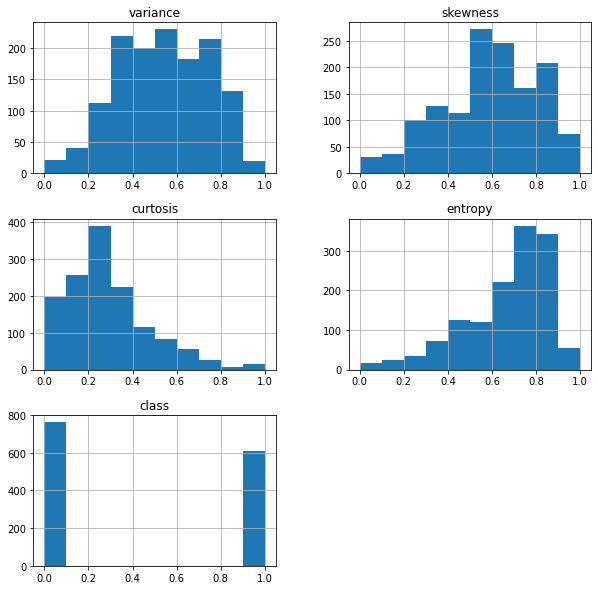

In [78]:
df.hist(figsize = (10,10))
plt.show()

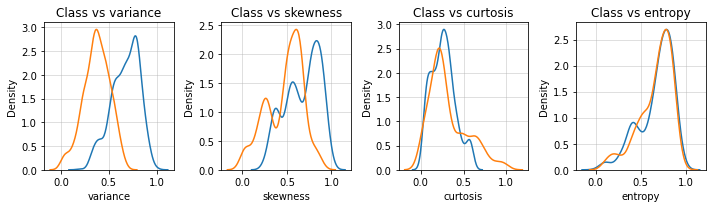

In [79]:
col_names = df.drop('class', axis = 1).columns.tolist()

plt.figure(figsize = (10,3))
i = 0
for col in col_names:
    plt.subplot(1,4,i+1)
    plt.grid(True, alpha =0.5)
    sns.kdeplot(df[col][df['class'] ==0], label = 'Fake note')
    sns.kdeplot(df[col][df['class'] ==1], label = 'Original note')
    plt.title('Class vs ' + col)
    plt.tight_layout()
    i+=1
plt.show()

##### Graph to see the repartition of genuine and forged notes

<AxesSubplot:xlabel='class', ylabel='count'>

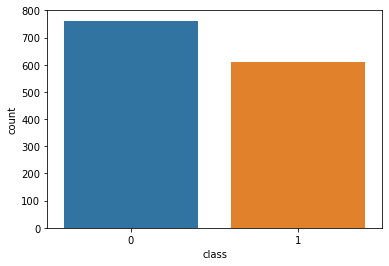

In [80]:
sns.countplot(x='class',data=df)

#### Looking at the correlation of the dataset to see if all inputs are relevants 

In [81]:
#df.corr(method='spearman').style.background_gradient(cmap='viridis')

<AxesSubplot:>

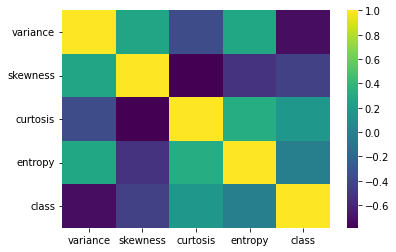

In [82]:
import seaborn as sns
corr_2 = df.corr().replace(np.nan,0)
sns.heatmap(corr_2, square=False,cmap='viridis')

#### Plotting the dataframe to see how inputs interacts between each other

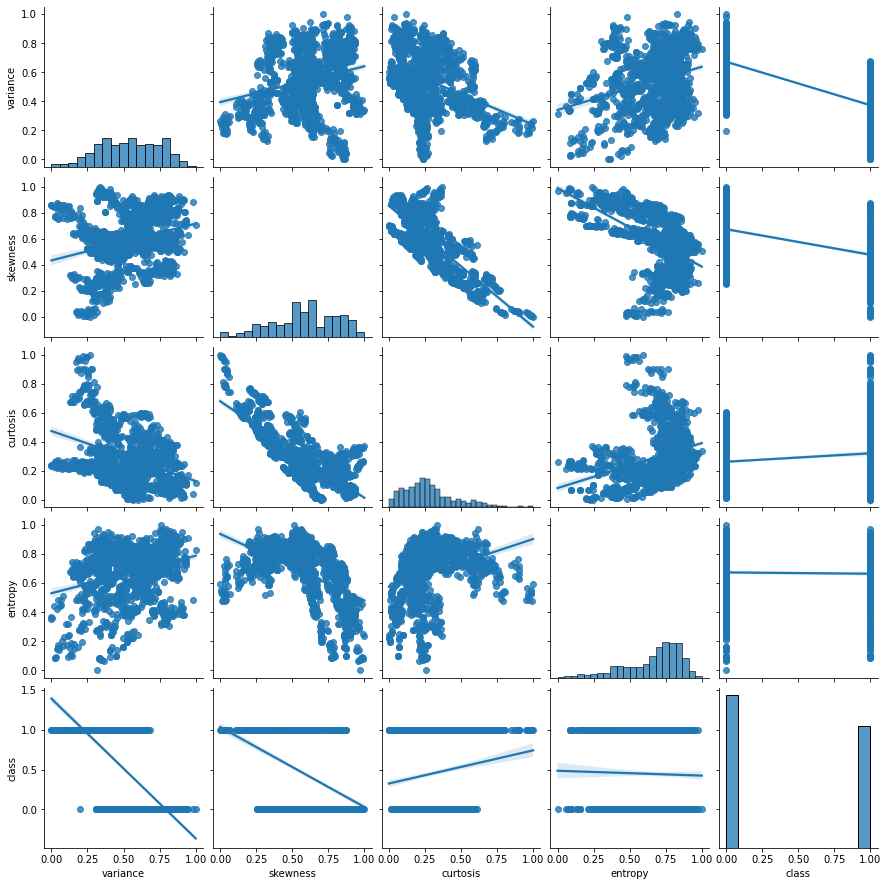

In [83]:
sns.pairplot(df, kind="reg")

#### Plotting the data depending on the class (genuine or forged)

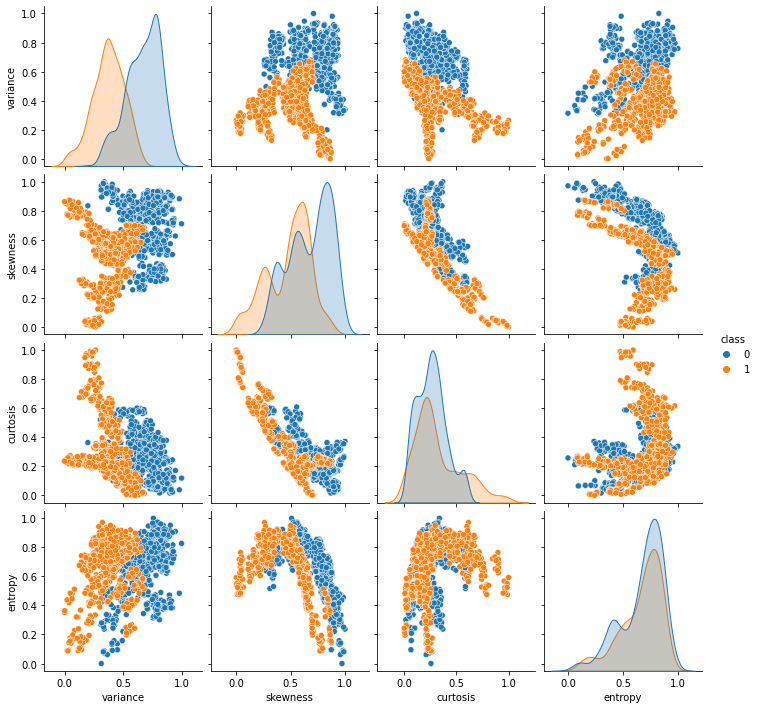

In [84]:
sns.pairplot(df, hue="class")

## Extracting Input and Output: Shuffling and Splitting the data

###### We have used 20% of the dataset to test the model we are building: now that all data have been normalized, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [85]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:4].values
Y = df.iloc[:,4].values

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

##### Show the results of the split

In [86]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1097 samples.
Testing set has 275 samples.


In [87]:
X_train

array([[0.21448197, 0.60874771, 0.26199453, 0.67689608],
       [0.31565815, 0.03592557, 0.77347233, 0.6037626 ],
       [0.76944378, 0.55214839, 0.25738083, 0.83492276],
       ...,
       [0.19293425, 0.74247045, 0.25236091, 0.28018586],
       [0.65542407, 0.59132937, 0.3214595 , 0.76966693],
       [0.34091253, 0.65257608, 0.19769531, 0.6638479 ]])

In [88]:
Y_train

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [89]:
X_test

array([[0.25175778, 0.58629657, 0.23575075, 0.5553252 ],
       [0.60240573, 0.68548197, 0.3265169 , 0.79776772],
       [0.21813094, 0.20433532, 0.76424494, 0.64656246],
       ...,
       [0.61460745, 0.80116147, 0.10763134, 0.68324286],
       [0.59580007, 0.59388132, 0.09006397, 0.78894951],
       [0.63846281, 0.8000015 , 0.18555151, 0.55297017]])

## Training Machine Learning methods and testing their accuracy 

###### We have tried multiple models with the same data and same training test to compare and find the best model. Indeed according to our dataset it is tough to know which model will best fit.

###### We just know that we have enough data to do advanced complex models: we can easily have a strong model, overfitting seem tough to fall in.

#### Dataset of the results

In [126]:
data = {'MethodName':[], 'Accuracy':[], 'Precision':[], 'Recall':[]}
data_result = pd.DataFrame(data)

In [127]:
data_result

,MethodName,Accuracy,Precision,Recall


## Supervised Learning Models
### As we have a classification problem based on four inputs, we need discriminative models. We have chosen the following supervised learning models to build the trained models:
##### Logistic Regression
##### KNN
##### Naive Bayes
##### Support Vector Machines (SVM)
##### Decision Tree 
##### Random Forest

###### Above are some discriminative Machine Learning models relevant for classification problems (we tried them all, code below). Our aim is to find the most accurate model for our problem (we used cross validation to have more accurate result)
######  Indeed there are numerous Machine Learning models, we choose some that seem to fit the best our problem (according to the way we saw the problem)

## Loss function
##### There is no interest in having a loss function (like Mean Square Error) because our output is boolean (either genuine or forged).

### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [93]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [94]:
print("Accuracy on Traininig dataset------> ", logmodel.score(X_train, Y_train))

Accuracy on Traininig dataset------>  0.9708295350957156


In [95]:
print("Accuracy on Test dataset--------> ",logmodel.score(X_test, Y_test))

Accuracy on Test dataset-------->  0.9636363636363636


In [96]:
Y_pred = logmodel.predict(X_test)
Y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [97]:
accuracies = accuracy_score(Y_test, Y_pred)
print(accuracies)

0.9636363636363636


In [98]:
cm_log= confusion_matrix(Y_test,Y_pred)
cm_log

array([[150,   7],
       [  3, 115]], dtype=int64)

Text(0.5, 15.0, 'predicted label')

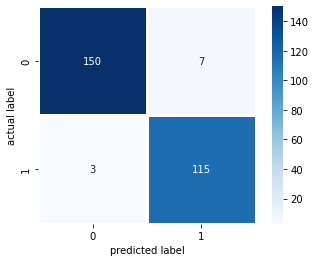

In [99]:
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap="Blues", color="#cd1076")
plt.ylabel("actual label")
plt.xlabel("predicted label")

In [100]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       157
           1       0.94      0.97      0.96       118

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



In [108]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred)
precision

0.9426229508196722

In [109]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred)
recall

0.9745762711864406

In [111]:
print("Accuracy of the model : ", accuracies*100, "%")

Accuracy of the model :  96.36363636363636 %


In [128]:
data_result = data_result.append({'MethodName': "Logistic Regression", 
                                      'Accuracy': accuracies*100, 
                                      'Precision': precision*100,
                                      'Recall' : recall*100}, ignore_index=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_7856\1574983114.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_result = data_result.append({'MethodName': "Logistic Regression",


In [129]:
data_result

,MethodName,Accuracy,Precision,Recall
0,Logistic Regression,96.363636,94.262295,97.457627


## NAIVE BAYES

In [130]:
from sklearn.naive_bayes import GaussianNB

In [131]:
nb = GaussianNB()

In [132]:
nb.fit(X_train,Y_train)

GaussianNB()

In [133]:
Y_pred = nb.predict(X_test)
Y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [134]:
cm_nb= confusion_matrix(Y_test,Y_pred)
cm_nb

array([[136,  21],
       [ 27,  91]], dtype=int64)

Text(0.5, 15.0, 'predicted label')

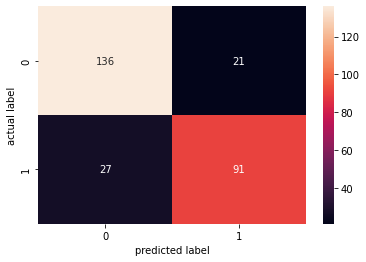

In [135]:
sns.heatmap(cm_nb, annot=True, fmt=".0f")
plt.ylabel("actual label")
plt.xlabel("predicted label")

In [136]:
accuracies = accuracy_score(Y_test,Y_pred)
accuracies

0.8254545454545454

In [137]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       157
           1       0.81      0.77      0.79       118

    accuracy                           0.83       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.83      0.82       275



In [138]:
print("Accuracy of the model : ",accuracies*100, "%")

Accuracy of the model :  82.54545454545455 %


In [139]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred)
precision

0.8125

In [140]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred)
recall

0.7711864406779662

In [141]:
data_result = data_result.append({'MethodName': "Naive Bayes", 
                                 'Accuracy': accuracies*100, 
                                      'Precision': precision*100,
                                      'Recall' : recall*100}, ignore_index=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_7856\2647260790.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_result = data_result.append({'MethodName': "Naive Bayes",


In [142]:
data_result

,MethodName,Accuracy,Precision,Recall
0,Logistic Regression,96.363636,94.262295,97.457627
1,Naive Bayes,82.545455,81.250000,77.118644


## KNN MODEL

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [145]:
Y_pred = knn.predict(X_test)
print(Y_pred)

[1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0]


In [146]:
cm_knn= confusion_matrix(Y_test,Y_pred)
print(cm_knn)

[[157   0]
 [  0 118]]


Text(0.5, 15.0, 'predicted label')

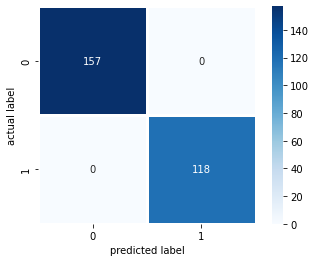

In [147]:
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=3, square=True, cmap="Blues", color="#cd1076")
plt.ylabel("actual label")
plt.xlabel("predicted label")

In [148]:
accuracies=accuracy_score(Y_test,Y_pred)
accuracies

1.0

In [149]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [151]:
print("Accuracy of the model : ",accuracies*100, "%")

Accuracy of the model :  100.0 %


In [152]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred)
precision

1.0

In [153]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred)
recall

1.0

In [154]:
data_result = data_result.append({'MethodName': "KNN",
                                 'Accuracy': accuracies*100, 
                                      'Precision': precision*100,
                                      'Recall' : recall*100}, ignore_index=True)
data_result

C:\Users\hp\AppData\Local\Temp\ipykernel_7856\4236751890.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_result = data_result.append({'MethodName': "KNN",


,MethodName,Accuracy,Precision,Recall
0,Logistic Regression,96.363636,94.262295,97.457627
1,Naive Bayes,82.545455,81.250000,77.118644
2,KNN,100.000000,100.000000,100.000000


## DECISION TREE

In [200]:
from sklearn.tree import DecisionTreeClassifier

In [210]:
dtc = DecisionTreeClassifier(random_state = 0, max_depth = 3, criterion='entropy')
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [211]:
Y_pred = dtc.predict(X_test)
print(Y_pred)

[1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1
 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]


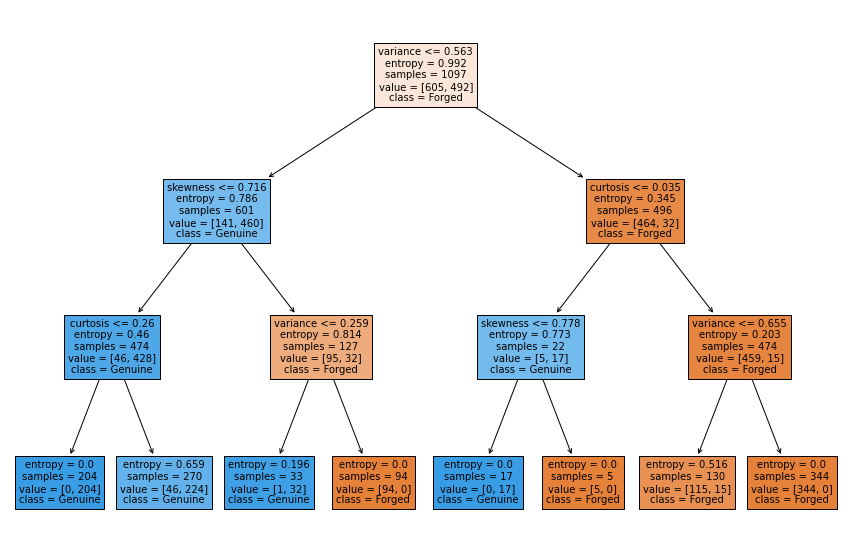

In [216]:
from sklearn import tree
plt.figure(figsize=(15,10))

tree.plot_tree(dtc,
               feature_names = ['variance', 'skewness', 'curtosis', 'entropy'], 
               class_names = ['Forged', 'Genuine'],
               filled = True,
               fontsize = 10)
plt.show()

In [158]:
cm_dtc= confusion_matrix(Y_test,Y_pred)
print(cm_dtc)

[[156   1]
 [  1 117]]


Text(0.5, 15.0, 'predicted label')

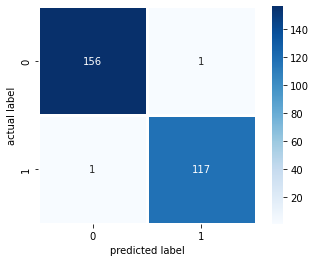

In [159]:
sns.heatmap(cm_dtc, annot=True, fmt=".0f", linewidths=3, square=True, cmap="Blues", color="#cd1076")
plt.ylabel("actual label")
plt.xlabel("predicted label")

In [160]:
accuracies=accuracy_score(Y_test,Y_pred)
accuracies

0.9927272727272727

In [161]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.99      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [162]:
print("Accuracy of the model : ", accuracies*100, "%")

Accuracy of the model :  99.27272727272727 %


In [163]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred)
precision

0.9915254237288136

In [164]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred)
recall

0.9915254237288136

In [165]:
data_result = data_result.append({'MethodName': "DecisionTree_entropy", 
                                  'Accuracy': accuracies*100, 
                                      'Precision': precision*100,
                                      'Recall' : recall*100}, ignore_index=True)
data_result

C:\Users\hp\AppData\Local\Temp\ipykernel_7856\3697062303.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_result = data_result.append({'MethodName': "DecisionTree_entropy",


,MethodName,Accuracy,Precision,Recall
0,Logistic Regression,96.363636,94.262295,97.457627
1,Naive Bayes,82.545455,81.250000,77.118644
2,KNN,100.000000,100.000000,100.000000
3,DecisionTree_entropy,99.272727,99.152542,99.152542


In [166]:
####GINI############
dtc_g= DecisionTreeClassifier(criterion='gini')
dtc_g.fit(X_train, Y_train)


DecisionTreeClassifier()

In [167]:
Y_pred = dtc_g.predict(X_test)
print(Y_pred)

[1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0]


In [168]:
cm_dtc_g= confusion_matrix(Y_test,Y_pred)
print(cm_dtc_g)

[[154   3]
 [  0 118]]


Text(0.5, 15.0, 'predicted label')

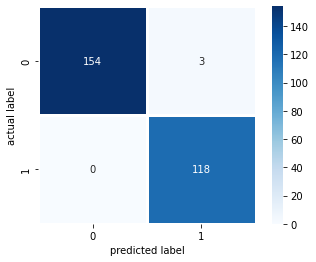

In [169]:
sns.heatmap(cm_dtc_g, annot=True, fmt=".0f", linewidths=3, square=True, cmap="Blues", color="#cd1076")
plt.ylabel("actual label")
plt.xlabel("predicted label")

In [170]:
accuracies=accuracy_score(Y_test,Y_pred)
accuracies

0.9890909090909091

In [171]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [172]:
print("Accuracy of the model : ", accuracies*100, "%")

Accuracy of the model :  98.9090909090909 %


In [173]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred)
precision

0.9752066115702479

In [174]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred)
recall

1.0

In [175]:
data_result = data_result.append({'MethodName': "DecisionTree_gini", 
                                  'Accuracy': accuracies*100, 
                                      'Precision': precision*100,
                                      'Recall' : recall*100}, ignore_index=True)
data_result

C:\Users\hp\AppData\Local\Temp\ipykernel_7856\414693753.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_result = data_result.append({'MethodName': "DecisionTree_gini",


,MethodName,Accuracy,Precision,Recall
0,Logistic Regression,96.363636,94.262295,97.457627
1,Naive Bayes,82.545455,81.250000,77.118644
2,KNN,100.000000,100.000000,100.000000
3,DecisionTree_entropy,99.272727,99.152542,99.152542
4,DecisionTree_gini,98.909091,97.520661,100.000000


## SVM

In [176]:
from sklearn.svm import SVC

In [177]:
svm = SVC()
svm.fit(X_train,Y_train)

SVC()

In [178]:
Y_pred= svm.predict(X_test)
print(Y_pred)

[1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0]


In [179]:
cm_svm= confusion_matrix(Y_test,Y_pred)
print(cm_svm)

[[157   0]
 [  0 118]]


Text(0.5, 15.0, 'predicted label')

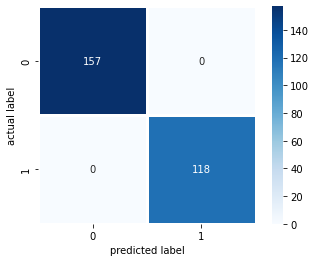

In [180]:
sns.heatmap(cm_svm, annot=True, fmt=".0f", linewidths=3, square=True, cmap="Blues", color="#cd1076")
plt.ylabel("actual label")
plt.xlabel("predicted label")

In [181]:
accuracies=accuracy_score(Y_test,Y_pred)
accuracies

1.0

In [182]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [183]:
print("Accuracy of the model : ", accuracies*100, "%")

Accuracy of the model :  100.0 %


In [184]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred)
precision

1.0

In [185]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred)
recall

1.0

In [186]:
data_result = data_result.append({'MethodName': "SVM", 
                                  'Accuracy': accuracies*100, 
                                      'Precision': precision*100,
                                      'Recall' : recall*100}, ignore_index=True)
data_result

C:\Users\hp\AppData\Local\Temp\ipykernel_7856\1511301427.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_result = data_result.append({'MethodName': "SVM",


,MethodName,Accuracy,Precision,Recall
0,Logistic Regression,96.363636,94.262295,97.457627
1,Naive Bayes,82.545455,81.250000,77.118644
2,KNN,100.000000,100.000000,100.000000
3,DecisionTree_entropy,99.272727,99.152542,99.152542
4,DecisionTree_gini,98.909091,97.520661,100.000000
5,SVM,100.000000,100.000000,100.000000


# RANDOM FOREST

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [227]:
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0, max_depth = 3)

In [228]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200,
                       random_state=0)

In [229]:
Y_pred= rfc.predict(X_test)
print(Y_pred)

[1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0]


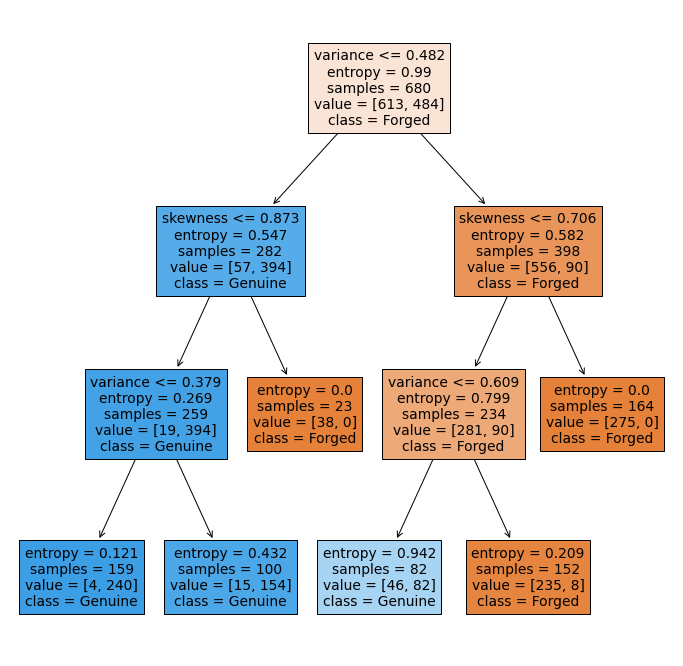

In [230]:
plt.figure(figsize=(12,12))
_ = tree.plot_tree(rfc.estimators_[0], 
                   feature_names=['variance', 'skewness', 'curtosis', 'entropy'],
                   class_names = ["Forged", "Genuine"],
                   filled=True)

In [226]:
rfc.estimators_[0].tree_.max_depth

7

In [191]:
cm_rfc= confusion_matrix(Y_test,Y_pred)
print(cm_rfc)

[[156   1]
 [  0 118]]


Text(0.5, 15.0, 'predicted label')

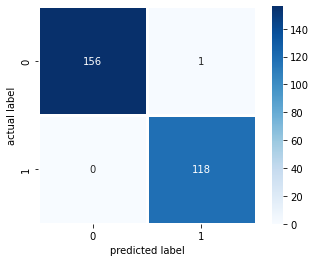

In [192]:
sns.heatmap(cm_rfc, annot=True, fmt=".0f", linewidths=3, square=True, cmap="Blues", color="#cd1076")
plt.ylabel("actual label")
plt.xlabel("predicted label")

In [193]:
accuracies=accuracy_score(Y_test,Y_pred)
accuracies

0.9963636363636363

In [194]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred)
precision

0.9915966386554622

In [195]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred)
recall

1.0

In [196]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       157
           1       0.99      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [197]:
print("Accuracy of the model : ", accuracies*100, "%")

Accuracy of the model :  99.63636363636364 %


In [198]:
data_result = data_result.append({'MethodName': "RandomForest", 
                                  'Accuracy': accuracies*100, 
                                      'Precision': precision*100,
                                      'Recall' : recall*100}, ignore_index=True)
data_result

C:\Users\hp\AppData\Local\Temp\ipykernel_7856\3500631407.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_result = data_result.append({'MethodName': "RandomForest",


,MethodName,Accuracy,Precision,Recall
0,Logistic Regression,96.363636,94.262295,97.457627
1,Naive Bayes,82.545455,81.250000,77.118644
2,KNN,100.000000,100.000000,100.000000
3,DecisionTree_entropy,99.272727,99.152542,99.152542
4,DecisionTree_gini,98.909091,97.520661,100.000000
5,SVM,100.000000,100.000000,100.000000
6,RandomForest,99.636364,99.159664,100.000000


# CONCLUSION
## KNN and SVM is the method with the best accuracy, we will use this method for further tests.